# 212 Task 3 PA
Vincent Taylor

### Part I

***Research Question***
The question I would like to use market basket analysis to answer is what items do customers frequently purchase together. By being able to answer this question we can begin to recommend products to customers based on historical purchasing habits. 

***One Goal of Data Analysis***
One goal I have for this analysis would be to use market basket analysis to identify items that we could potentially bundle together in the hopes of increasing revenue.

### Part II

***What is Market Basket Analysis***
Market basket analysis is a data mining technique that many retail companies use in order to drive sales and better understand their consumers purchasing patterns. Market basket analysis requires an analyst to review large datasets, many times this is done using KPIs such as purchase history. Having purchase history and other KPIs is beneficial in terms of unveil products that tend to be purchased together. Having this information can help retailers make better informed decisions in terms of inventory management as well as market strategies.

***Example of transactions in the dataset***
An example of a customer basket in the dataset is; 

Logitech M510 Wireless mouse
HP 63 Ink
HP 65 ink
nonda USB C to USB Adapter
10ft iPHone Charger Cable
HP 902XL ink
Creative Pebble 2.0 Speakers
Cleaning Gel Universal Dust Cleaner
Micro Center 32GB Memory card
YUNSONG 3pack 6ft Nylon Lightning Cable
TopMate C5 Laptop Cooler pad
Apple USB-C Charger cable
HyperX Cloud Stinger Headset
TONOR USB Gaming Microphone
Dust-Off Compressed Gas 2 pack
3A USB Type C Cable 3 pack 6FT
HOVAMP iPhone charger
SanDisk Ultra 128GB card
FEEL2NICE 5 pack 10ft Lighning cable
FEIYOLD Blue light Blocking Glasses

***Assumption of Market Basket Analysis***
The most common assumption in market basket analysis is that if a consumer purchases one item, then they are likely to buy another item or items, an example of this would be milk and eggs. This means that if two or more items are typically found together in a customers shopping basket they likely complement each other and that purchasing one will in turn lead to another item being purchased. On the contrary market basket analysis requires their to be enough data to draw on between certain items being frequently purchased together, meaning if there is not enough data no useful conclusions can be drawn.

***Library Selection***

|Library|Descrtption
|---|---|
|Pandas|Data analysis and preperation|
|Numpy|Data analysis and preperation|
|Matplotlib|Data visualization|
|Seaborn|Data visualization|
|Scikit learn|Machine learning and predictive modeling|
|mlxtend|Machine learning extensions|


### Part III

---

In [1]:
!pip install mlxtend

### Preparing Data for Market basket Analysis (C1)

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
from pandas import DataFrame
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('teleco_market_basket.csv')
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(15002, 20)

In [5]:
df = df[df['Item01'].notna()]
df.shape

(7501, 20)

In [6]:
#Dataframe conversion to list
rows = []
for i in range (0, 7501):
    rows.append([str(df.values[i,j])
        for j in range(0,20)])

In [7]:
#creating an array
DE = TransactionEncoder()
array = DE.fit(rows).transform(rows)

#converting array into dataframe
transaction = pd.DataFrame(array, columns = DE.columns_)

In [8]:
#True is equal to missing value
transaction

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nan,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7497,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [9]:
for col in transaction.columns:
    print(col)

10ft iPHone Charger Cable
10ft iPHone Charger Cable 2 Pack
3 pack Nylon Braided Lightning Cable
3A USB Type C Cable 3 pack 6FT
5pack Nylon Braided USB C cables
ARRIS SURFboard SB8200 Cable Modem
Anker 2-in-1 USB Card Reader
Anker 4-port USB hub
Anker USB C to HDMI Adapter
Apple Lightning to Digital AV Adapter
Apple Lightning to USB cable
Apple Magic Mouse 2
Apple Pencil
Apple Pencil 2nd Gen
Apple Power Adapter Extension Cable
Apple USB-C Charger cable
AutoFocus 1080p Webcam
BENGOO G90000 headset
Blue Light Blocking Glasses
Blue Light Blocking Glasses 2pack
Brother Genuine High Yield Toner Cartridge
Cat 6 Ethernet Cable 50ft
Cat8 Ethernet Cable
CicTsing MM057 2.4G Wireless Mouse
Cleaning Gel Universal Dust Cleaner
Creative Pebble 2.0 Speakers
DisplayPort ot HDMI adapter
Dust-Off Compressed Gas
Dust-Off Compressed Gas 2 pack
FEEL2NICE 5 pack 10ft Lighning cable
FEIYOLD Blue light Blocking Glasses
Falcon Dust Off Compressed Gas
HOVAMP Mfi 6pack Lightning Cable
HOVAMP iPhone charger
HP 61 

In [10]:
#Dropping empty columns (removing NaN values)
cleaned_df = transaction.drop(['nan'], axis = 1)
cleaned_df.head(7501)

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Copy of Cleaned Dataset (C1)

In [11]:
#Writing transformed data to csv
cleaned_df.to_csv('df_clean1.csv', index=False)
cleaned_df.columns

Index(['10ft iPHone Charger Cable', '10ft iPHone Charger Cable 2 Pack',
       '3 pack Nylon Braided Lightning Cable',
       '3A USB Type C Cable 3 pack 6FT', '5pack Nylon Braided USB C cables',
       'ARRIS SURFboard SB8200 Cable Modem', 'Anker 2-in-1 USB Card Reader',
       'Anker 4-port USB hub', 'Anker USB C to HDMI Adapter',
       'Apple Lightning to Digital AV Adapter',
       ...
       'hP 65 Tri-color ink', 'iFixit Pro Tech Toolkit', 'iPhone 11 case',
       'iPhone 12 Charger cable', 'iPhone 12 Pro case', 'iPhone 12 case',
       'iPhone Charger Cable Anker 6ft', 'iPhone SE case',
       'nonda USB C to USB Adapter', 'seenda Wireless mouse'],
      dtype='object', length=119)

### Data Mining using Apriori Algorithm


***Apriori Algorithm***
The algorithm that I will be using to performing the analysis is the apriori algorithm. The Apriori Algorithm is a an algorithm used in machine learning in order to extract insights into the relationships between items within a dataset. My initial research question is derived from a process that many retailers use in order to suggest products. The apriori algorithm is something that we see advertised to us all the time on websites such as Amazon. 

In our inital library selection we imported association rules from the mlxtend library. Association rules are critical in terms of any market baset analysis Below I have listed three important concepts that an analyst will need to have an understanding of before performing this analysis. The below text comes from Kaggle and is apart of a larger article about association rules.

"There are 3 important concepts we need to know in the Apriori algorithm; Support, Confidence, and Lift.

Let X and Y represent the products in the market, and N denote the total number of products.

***Support***: Indicates how often X and Y are seen together.
    Support(X, Y) = Freq(X,Y)/N

***Confidence***: Indicates the probability that a customer who buys product X will buy product Y.
Confidence(X, Y) = Freq(X,Y) / Freq(X)

***Lift***: Indicates how much the sales of Y product increased when product X was purchased.
Lift = Support (X, Y) / ( Support(X) * Support(Y) )"

In [12]:
#Loading and inital data exploration
df = pd.read_csv('df_clean1.csv')
df.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#Exploring columns of data
df.columns

Index(['10ft iPHone Charger Cable', '10ft iPHone Charger Cable 2 Pack',
       '3 pack Nylon Braided Lightning Cable',
       '3A USB Type C Cable 3 pack 6FT', '5pack Nylon Braided USB C cables',
       'ARRIS SURFboard SB8200 Cable Modem', 'Anker 2-in-1 USB Card Reader',
       'Anker 4-port USB hub', 'Anker USB C to HDMI Adapter',
       'Apple Lightning to Digital AV Adapter',
       ...
       'hP 65 Tri-color ink', 'iFixit Pro Tech Toolkit', 'iPhone 11 case',
       'iPhone 12 Charger cable', 'iPhone 12 Pro case', 'iPhone 12 case',
       'iPhone Charger Cable Anker 6ft', 'iPhone SE case',
       'nonda USB C to USB Adapter', 'seenda Wireless mouse'],
      dtype='object', length=119)

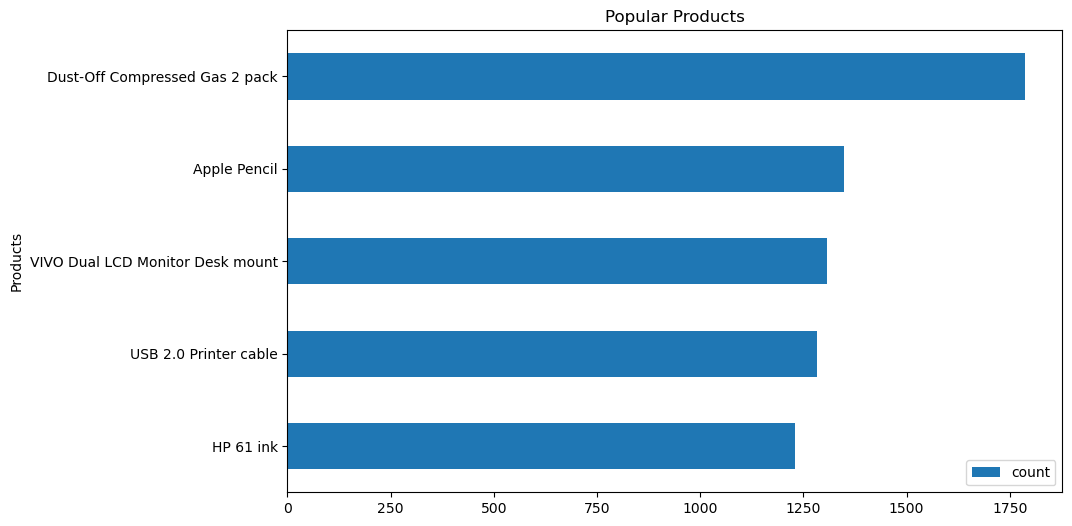

In [14]:
# Five most popular products in the transformed dataset

count = df.loc[:,:].sum()
pop_item = count.sort_values(0, ascending = False).head(5)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {'index': 'Products',0:'count'})

#Data visualization of most popular items 
plt.rcParams['figure.figsize'] = (10,6)
ax = pop_item.plot.barh(x = 'Products', y = 'count')
plt.title('Popular Products')
plt.gca().invert_yaxis()

### Association Rules (C2)
---

In [15]:
#creating Apriori object called rules
rules = apriori(df, min_support = 0.02, use_colnames = True)
rules

,support,itemsets
0,0.050527,(10ft iPHone Charger Cable 2 Pack)
1,0.042528,(3A USB Type C Cable 3 pack 6FT)
2,0.029463,(Anker 2-in-1 USB Card Reader)
3,0.068391,(Anker USB C to HDMI Adapter)
4,0.087188,(Apple Lightning to Digital AV Adapter)
...,...,...
98,0.023730,"(Screen Mom Screen Cleaner kit, USB 2.0 Printe..."
99,0.035462,"(VIVO Dual LCD Monitor Desk mount, Screen Mom ..."
100,0.020131,"(USB 2.0 Printer cable, Stylus Pen for iPad)"
101,0.025197,"(VIVO Dual LCD Monitor Desk mount, Stylus Pen ..."


### Provide values for the support, lift, and confidence of the association rules table (C3)

---

In [16]:
# Creating rules table with lift > 1 filtering on top 3 values
rules_table = association_rules(rules, metric = 'lift', min_threshold = 1)
rules_table.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
1,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182,0.627330
2,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
3,(Dust-Off Compressed Gas 2 pack),(Anker USB C to HDMI Adapter),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
4,(VIVO Dual LCD Monitor Desk mount),(Anker USB C to HDMI Adapter),0.174110,0.068391,0.020931,0.120214,1.757755,0.009023,1.058905,0.521973
5,(Anker USB C to HDMI Adapter),(VIVO Dual LCD Monitor Desk mount),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117,0.462740
6,(Apple Lightning to Digital AV Adapter),(Apple Pencil),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
7,(Apple Pencil),(Apple Lightning to Digital AV Adapter),0.179709,0.087188,0.028796,0.160237,1.837830,0.013128,1.086988,0.555754
8,(Apple Lightning to Digital AV Adapter),(Dust-Off Compressed Gas 2 pack),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552,0.162275
9,(Dust-Off Compressed Gas 2 pack),(Apple Lightning to Digital AV Adapter),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889,0.194486


In [17]:
# sorting the rules by confidence metric and showing top 3 values
top_three_rules = rules_table.sort_values('confidence', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
36,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
53,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369


In [18]:
# sorting the rules by lift metric and showing top 3 values
top_three_rules = rules_table.sort_values('lift', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
84,(VIVO Dual LCD Monitor Desk mount),(SanDisk Ultra 64GB card),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
85,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
64,(FEIYOLD Blue light Blocking Glasses),(VIVO Dual LCD Monitor Desk mount),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186


In [19]:
# sorting the rules by support metric and showing top 3 values
top_three_rules = rules_table.sort_values('support', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
62,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
63,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
41,(Dust-Off Compressed Gas 2 pack),(HP 61 ink),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197


In [23]:
sorted_rules = rules_table[(rules_table['lift'] > 1)]
sorted_rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
1,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182,0.627330
2,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144


### Part IV: Data Summary and Implications

***Summarize the significance of support, lift, and confidence (D1)***

***Support***: Support is the the frequency of times that an item appears within a dataframe. This is typically used by retailers as a measurement of popularity of an item. In my analysis the most frequent items that appear are the VIVO Dual LCD Monitor Desk Mount and the Dust-off Compressed Gas 2 pack appear the most in this analysis.

***Confidence*** : Confidence shows how likely the purchase of one item (x) leads to the purchase of another item (y). This metric is measured by the amount of transactions in which the antecedent or X appears but also consequents or Y appears. A downside to the confidence metric is that incorrect conclusions can be drawn based on a misrepresentation of the importance of an association.

***Lift***:  Lift similar to confidence but reversed. It measures how likely the purchase of consequent or (y) is purchased when the antecedent or (x) is purchased. Lift values > 1 tend to mean that consequent would likely be purchased if antecedent (x) is purchased and consequently lift values < 1 would indicate that the items dont show any correlation or are unlikely to be purchased. In my analysis the top three rules have a likelylood of being purchased together.

***Discuss the practical significance of the findings from the analysis (D2)***

The practical significance of the findings from this analysis I believe to be extremely beneficial in terms of being able to patterns in consumer purchasing activity. I believe it would be beneficial to begin to implement this on the company website by pairing it toward the right showing what other customers also purchased. This could potentially lead to an increase in items and would not be too cumbersome compared to having a store associate move items around the store which may lead to current customers becoming agitated.

***Recommend a course of action (D3)***

I would reccomend to internal stakeholders that we see if there are any team members who have the bandwidth to work on getting this implemented on the company website, and that going forward we create a quarterly deliverable of providing data on consumer basket behavior. Long term I think it would be more beneficial to create a system that uses machine learning or an API in order to create real time reccomendations to consumers.

***Link to Panopto Recording***
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5930774d-d57c-4cd6-b644-b10100343543

### References

Association Rules with Apriori. (n.d.). Kaggle.com. Retrieved January 23, 2024, from https://www.kaggle.com/code/burakbuyukyagmur/association-rules-with-apriori

